In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
# read input
img = cv.imread("/content/drive/MyDrive/MintafelismeresGyak/OpenCV_gyakorlat-main/images/Moire1.jpg", cv.IMREAD_GRAYSCALE)

Now we make the 2D FFT of the loaded grayscake image.

In [5]:
# do dft saving as complex output
dft = np.fft.fft2(img, axes=(0,1))

The pixel coordinates of FFT coefficients are rearranged to place low frequency components in the middle of the image.

In [6]:
# apply shift of origin to center of image
dft_shift = np.fft.fftshift(dft)

This code is only for visualization of the freq. coefficient. The magnitude of complex numbers are shown after taking the log and rescaling.

In [9]:
# generate spectrum from magnitude image (for viewing only)
mag = np.abs(dft_shift)
spec = np.log(mag) / 20

For low pass filtering we make a disk shaped mask. To avid the ringing around edges a blurred mask is also generated.

In [61]:
# create white circle mask on black background and invert so black circle on white background
radius = 82
mask = np.zeros_like(img)
cy = mask.shape[0] // 2
cx = mask.shape[1] // 2
cv.circle(mask, (cx,cy), radius, (255,255,255), -1)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [62]:
# blur the mask
mask2 = cv.GaussianBlur(mask, (31,31), 0)
mask2 = cv.GaussianBlur(mask2, (31,31), 0)
mask2 = cv.GaussianBlur(mask2, (31,31), 0)


Now, here is the filtering step itself.

In [63]:
# apply mask to dft_shift
dft_shift_masked = np.multiply(dft_shift,mask) / 255
dft_shift_masked2 = np.multiply(dft_shift,mask2) / 255

Rearrange of the coeffs to their original position.

In [64]:
# shift origin from center to upper left corner
back_ishift = np.fft.ifftshift(dft_shift)
back_ishift_masked = np.fft.ifftshift(dft_shift_masked)
back_ishift_masked2 = np.fft.ifftshift(dft_shift_masked2)


Make inverse FFT 2D.

In [65]:
# do idft saving as complex output
img_back = np.fft.ifft2(back_ishift, axes=(0,1))
img_filtered = np.fft.ifft2(back_ishift_masked, axes=(0,1))
img_filtered2 = np.fft.ifft2(back_ishift_masked2, axes=(0,1))


The obtained FT coeffs should be clipped and converted back to uint8.

In [66]:
# combine complex real and imaginary components to form the original image again
img_back_final = np.abs(img_back).clip(0,255).astype(np.uint8)
img_filtered_final = np.abs(img_filtered).clip(0,255).astype(np.uint8)
img_filtered2_final = np.abs(img_filtered2).clip(0,255).astype(np.uint8)
cv.imwrite("/content/drive/MyDrive/MintafelismeresGyak/OpenCV_gyakorlat-main/images/Moire1_f1.jpg", img_filtered_final)

cv.imwrite("/content/drive/MyDrive/MintafelismeresGyak/OpenCV_gyakorlat-main/images/Moire1_f2.jpg", img_filtered2_final)


True

(-0.5, 789.5, 775.5, -0.5)

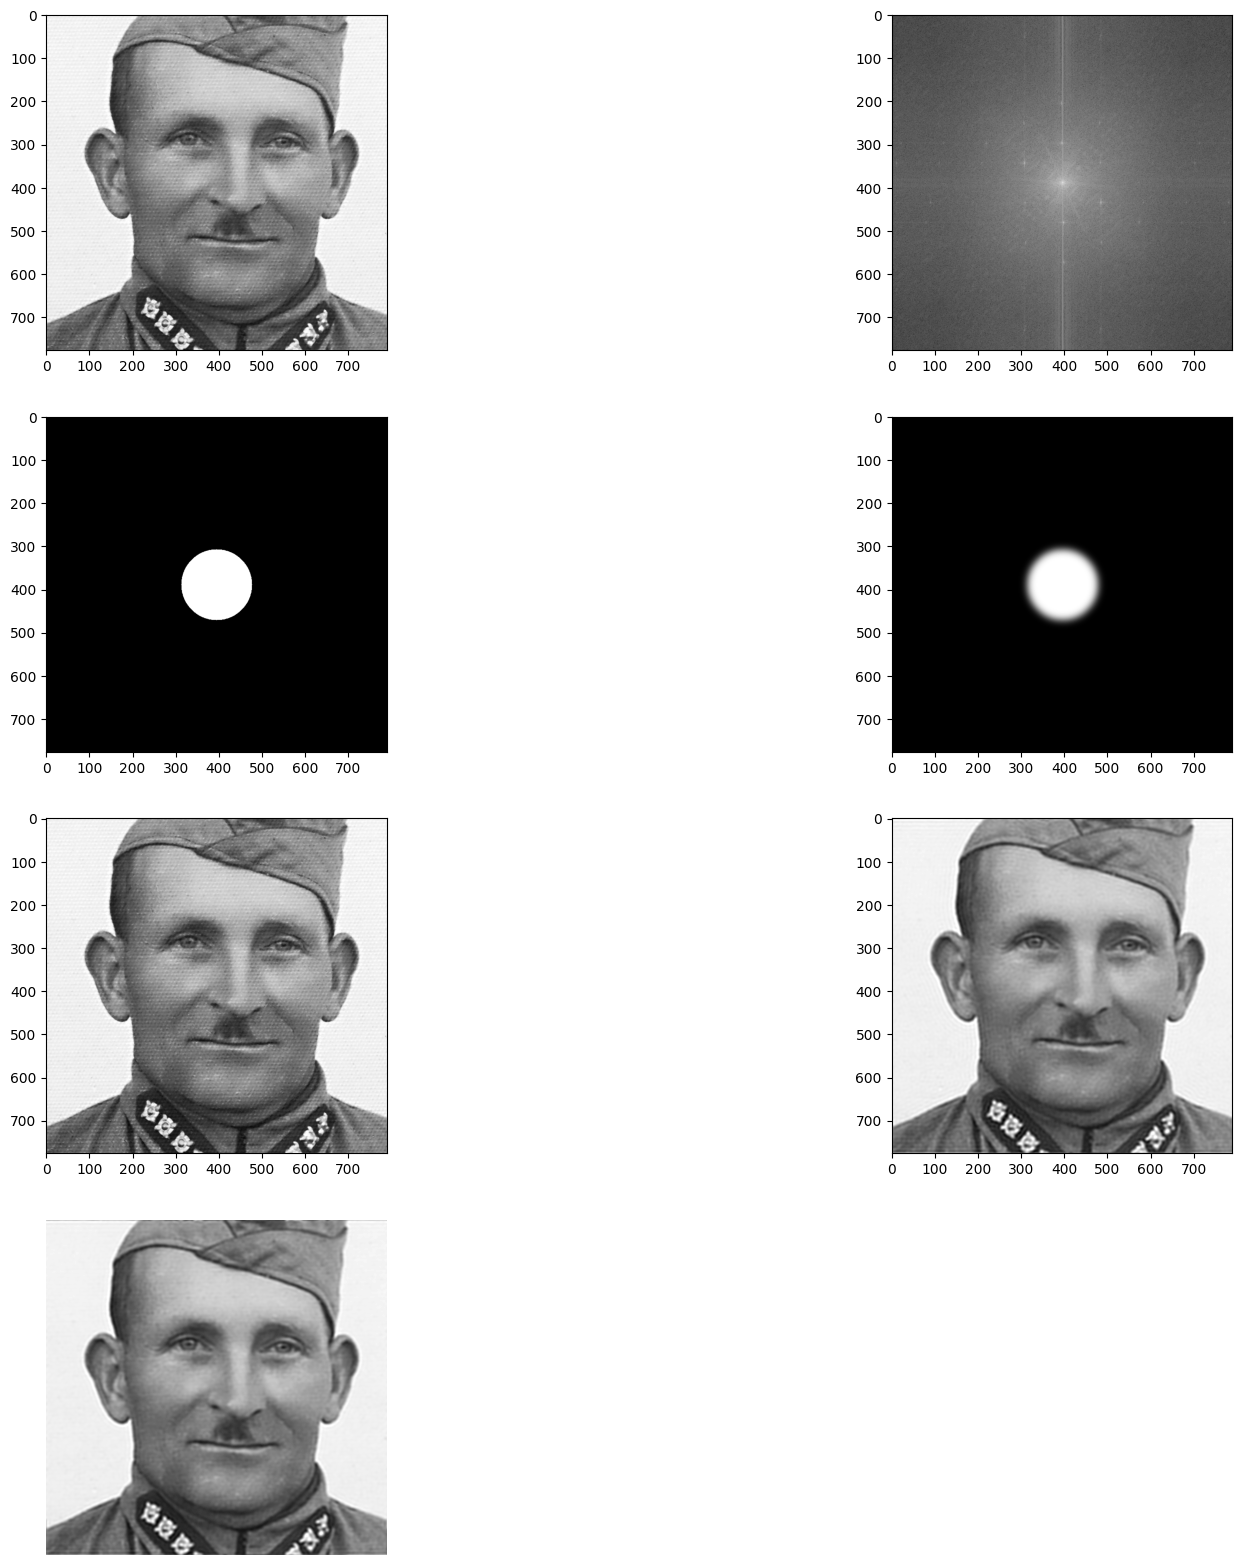

In [67]:
plt.figure(figsize=(20, 20))
plt.subplot(421), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.subplot(422), plt.imshow(spec, cmap='gray') # spectrum
plt.subplot(423), plt.imshow(mask, cmap='gray') # mask
plt.subplot(424), plt.imshow(mask2, cmap='gray') # mask2
plt.subplot(425), plt.imshow(img_back_final, cmap='gray')
plt.subplot(426), plt.imshow(img_filtered_final, cmap='gray')
plt.subplot(427), plt.imshow(img_filtered2_final, cmap='gray') # ORIGINAL DFT/IFT ROUND TRIP
plt.axis('off')


In [ ]:
cv2.imshow("SPECTRUM", spec)
cv2.imshow("MASK", mask)
cv2.imshow("MASK2", mask2)
cv2.imshow("ORIGINAL DFT/IFT ROUND TRIP", img_back)
cv2.imshow("FILTERED DFT/IFT ROUND TRIP", img_filtered)
cv2.imshow("FILTERED2 DFT/IFT ROUND TRIP", img_filtered2)